# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [33]:
# Importando as bibliotecas 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

ImportError: cannot import name 'tree' from 'sklearn.tree' (C:\Users\noron\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In [3]:
df = pd.read_csv("df_m07_isabela.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  bool   
 10  sexo_M                                  16650 non-null  in

In [20]:
# variáveis target (y) e explicativas (X)

y = df.mau
X = df.drop('mau', axis=1)



In [21]:
# separar 70% dos dados para treinamento e 30% para validação

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)



#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
# 1. Definindo o objeto:

clf = DecisionTreeClassifier(random_state=100)


In [11]:
# 2. Treinando o modelo

clf = clf.fit(X_train,y_train)

In [12]:
clf

DecisionTreeClassifier(random_state=100)

[Text(1060.9608573344217, 528.5, 'Unnamed: 0 <= 16474.5\ngini = 0.05\nsamples = 4995\nvalue = [4868, 127]\nclass = Bom'),
 Text(1050.5504095732276, 498.3, 'educacao_Incomplete higher <= 0.5\ngini = 0.029\nsamples = 4941\nvalue = [4868, 73]\nclass = Bom'),
 Text(768.5635057136194, 468.1, 'tempo_emprego <= 1.522\ngini = 0.026\nsamples = 4727\nvalue = [4664, 63]\nclass = Bom'),
 Text(512.3078941231344, 437.9, 'tempo_emprego <= 1.492\ngini = 0.047\nsamples = 1258\nvalue = [1228, 30]\nclass = Bom'),
 Text(452.04116138059703, 407.70000000000005, 'tempo_emprego <= 1.278\ngini = 0.038\nsamples = 1241\nvalue = [1217, 24]\nclass = Bom'),
 Text(393.9703824626866, 377.5, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.032\nsamples = 1182\nvalue = [1163, 19]\nclass = Bom'),
 Text(309.0601679104478, 347.3, 'estado_civil_Widow <= 0.5\ngini = 0.027\nsamples = 1150\nvalue = [1134, 16]\nclass = Bom'),
 Text(196.49720149253733, 317.1, 'Unnamed: 0 <= 12964.0\ngini = 0.023\nsamples = 1049\nvalue = [1

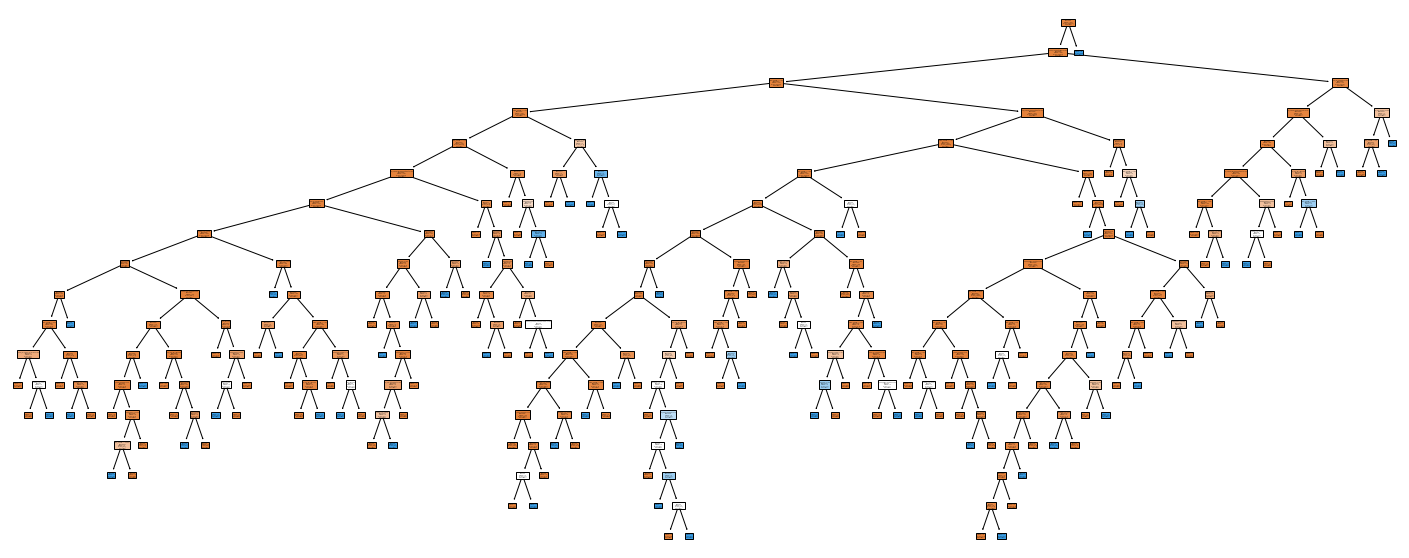

In [36]:
# 3. Visualizando a árvore

fig = plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X_train.columns)

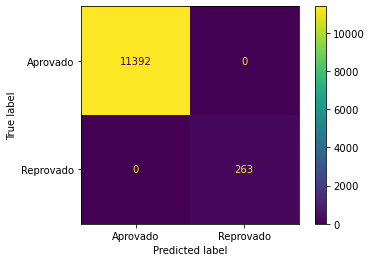

In [15]:
# 4. Matriz de confusão

plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovado', 'Reprovado'])

In [24]:
# 5. Acurárcia do modelo
y_chapeu = clf.predict(X_train)
y_chapeu


array([False, False, False, ..., False, False, False])

In [25]:
accuracy_score(y_test, y_chapeu_teste)

0.9791791791791792

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [22]:
# 1. Classificando:

clf = clf.fit(X_test,y_test)

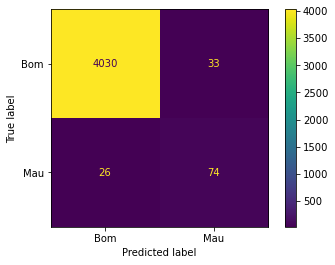

In [38]:
# 2. Matriz de confusão da base de teste

plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado']);

In [28]:
# 3. Acurácia

y_chapeu_teste = clf.predict(X_test)
accuracy_score(y_test, y_chapeu_teste)

1.0

In [32]:
# 4. Nova árvore

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
model = clf2.fit(X_train,y_train)



[Text(802.5609375, 518.8909090909091, 'Unnamed: 0 <= 16470.0\ngini = 0.045\nsamples = 12487\nvalue = [12197, 290]\nclass = Bom'),
 Text(791.4009375, 469.4727272727273, 'tempo_emprego <= 2.848\ngini = 0.025\nsamples = 12352\nvalue = [12197, 155]\nclass = Bom'),
 Text(368.62875, 420.05454545454546, 'idade <= 30.445\ngini = 0.037\nsamples = 4518\nvalue = [4433, 85]\nclass = Bom'),
 Text(114.39, 370.6363636363636, 'Unnamed: 0 <= 13412.0\ngini = 0.095\nsamples = 519\nvalue = [493, 26]\nclass = Bom'),
 Text(50.22, 321.21818181818185, 'idade <= 28.567\ngini = 0.053\nsamples = 404\nvalue = [393, 11]\nclass = Bom'),
 Text(22.32, 271.8, 'tempo_emprego <= 2.734\ngini = 0.008\nsamples = 264\nvalue = [263, 1]\nclass = Bom'),
 Text(11.16, 222.38181818181818, 'gini = 0.0\nsamples = 259\nvalue = [259, 0]\nclass = Bom'),
 Text(33.480000000000004, 222.38181818181818, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Bom'),
 Text(78.12, 271.8, 'idade <= 28.777\ngini = 0.133\nsamples = 140\nvalue = [130,

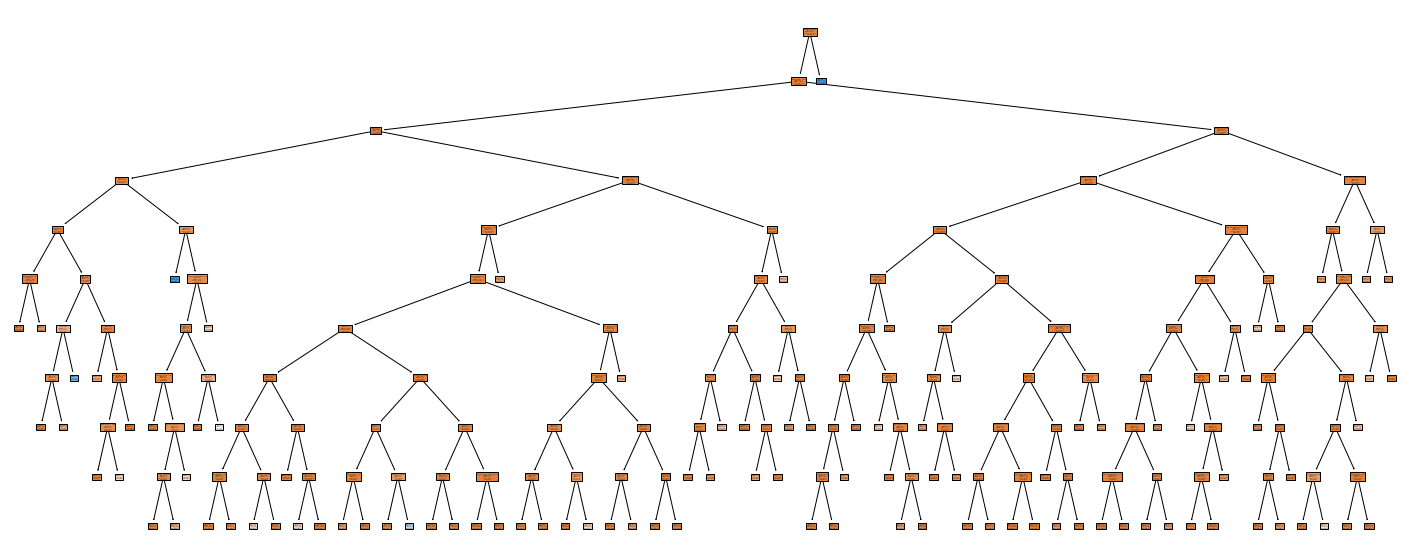

In [37]:
plt.figure(figsize=(25, 10))
plot_tree(clf2,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns)

In [46]:
# 5. Se na matriz de confusão, todos estivessem classificados como 'bons', a acurácia, de acordo com a fórmula, seria 0.97:

# 16260, 0
# 390, 0

(16260 + 0) / 16650



0.9765765765765766